In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

rnd_state = 42 #in order to reproduce the code

TASK 1:
load data and explore them

In [46]:
url = 'exam2022_01_13.csv'
df = pd.read_csv(url, sep = ',')

In [48]:
df.shape #structure of dataset

(329, 13)

In [49]:
df.size #size of dataset

4277

histograms of numeric data

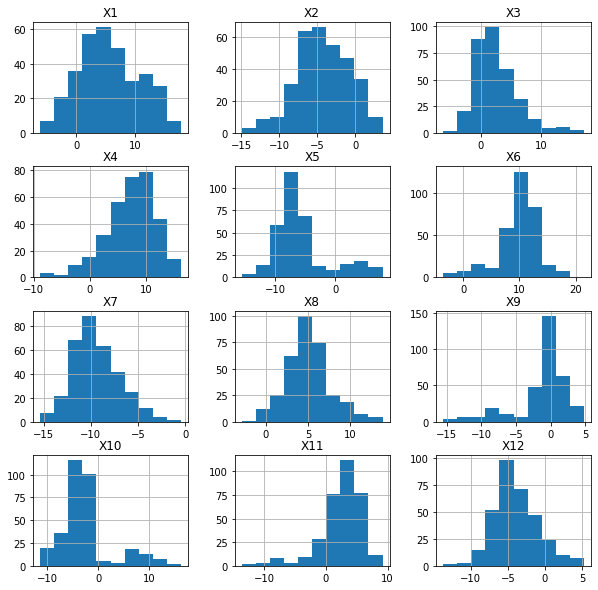

In [88]:
pd.DataFrame.hist(df, figsize = [10,10]);

 Histogram of the frequencies of the class labels, contained in the “language” column .

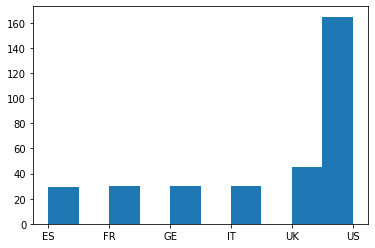

In [72]:
#histogram of the frequencies of the class labels contained in the “language” column .
col= 'language'
plt.hist(df[col])
plt.show()

TASK 2: drop the rows with NaN values

In [51]:
df2 = df.dropna()
print(f"After removing the NaNs, we're left with {df2.shape[0]} rows.")


After removing the NaNs, we're left with 321 rows.


(321, 13)

In [83]:
df2.shape  #the shape of dataset after cleaning null values

(321, 13)

Split data set in train and test set


In [52]:
X = df2.drop([col], axis=1)
y = df2[col]

In [84]:
ts=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rnd_state)
print(f"Now, X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

Now, X_train has 240 rows and 12 columns.


TASK:
tune the hyper–parameters of Model1 and Model 2 with Cross Validation on the
training set, optimize for recall_macro 

In [54]:
#we've decided to use a Decision tree and a Random Forest classifier
model_lbls = ['DT', 'RFC'] 

#these are the parameters we're going to test
tuned_param_dt = [{'max_depth':list(range(1,20))}] 
tuned_param_rfc = [{'max_depth':list(range(1,11))}]

models = {
    
    'DT': {
            'estimator': DecisionTreeClassifier(),
            'parameter': tuned_param_dt
          },
    
    
    'RFC': {
            'estimator': RandomForestClassifier(),
            'parameter': tuned_param_rfc
          },
}

scores = [
    'recall_macro', 
         ]



In [114]:
#results_short = {}
best_param = {}

for score in scores:
    for m in model_lbls:
        clf = GridSearchCV(models[m]['estimator'], models[m]['parameter'], cv=5,
                          scoring=score, 
                           return_train_score = False,
                           n_jobs = 2,
                           )
        clf.fit(X_train, y_train)
        best_param[m] = [clf.best_params_]


In [115]:
model1 = DecisionTreeClassifier(max_depth = best_param['DT'][0]['max_depth']
                               , random_state=rnd_state)
model2 = RandomForestClassifier(max_depth= best_param['RFC'][0]['max_depth'],
                               random_state=rnd_state)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train);

model1_predictions = model1.predict(X_test)
model2_predictions = model2.predict(X_test)

TASK 4: produce a classification report for Model1 on the test set 

In [116]:
print(classification_report(y_test, model1_predictions)) #for model 1

              precision    recall  f1-score   support

          ES       0.70      0.88      0.78         8
          FR       0.50      0.71      0.59         7
          GE       0.40      0.44      0.42         9
          IT       0.64      0.64      0.64        11
          UK       1.00      0.17      0.29         6
          US       0.82      0.80      0.81        40

    accuracy                           0.69        81
   macro avg       0.68      0.61      0.59        81
weighted avg       0.72      0.69      0.68        81



TASK 5: produce the confusion matrix for Model1 on the test set

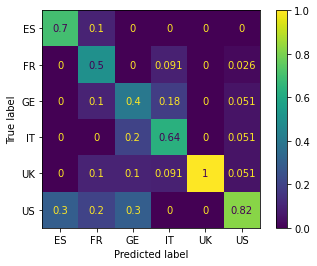

In [117]:
plot_confusion_matrix(model1, X_test, y_test, normalize='pred')
plt.show()

TASK 7: produce a classification report for Model2 on the test set 

In [118]:
print(classification_report(y_test, model2_predictions)) #for model 2

              precision    recall  f1-score   support

          ES       1.00      0.88      0.93         8
          FR       1.00      0.71      0.83         7
          GE       0.80      0.44      0.57         9
          IT       0.60      0.55      0.57        11
          UK       0.75      0.50      0.60         6
          US       0.76      0.95      0.84        40

    accuracy                           0.78        81
   macro avg       0.82      0.67      0.73        81
weighted avg       0.79      0.78      0.77        81



TASK 8: produce the confusion matrix for Model2 on the test set 

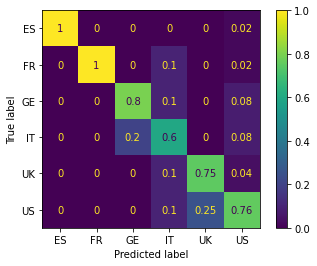

In [119]:
plot_confusion_matrix(model2, X_test, y_test, normalize='pred')
plt.show()

In [120]:
model1_accuracy = accuracy_score(y_test, model1_predictions)
model2_accuracy = accuracy_score(y_test, model2_predictions)

print('Accuracy of model1:',round(model1_accuracy*100,3),'%')
print('Accuracy of model2:', round(model2_accuracy*100,3),'%')

Accuracy of model1: 69.136 %
Accuracy of model2: 77.778 %
